# From Scratch

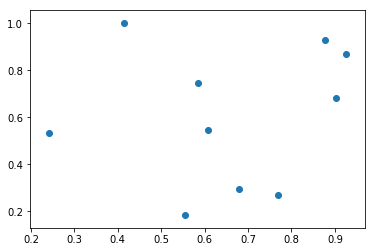

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

N = 10
x = np.random.rand(N)
y = np.random.rand(N)

#plotting
plt.scatter(x,y)

## Linear Regression

m:0.19437643274941138 b:0.4780019953933593


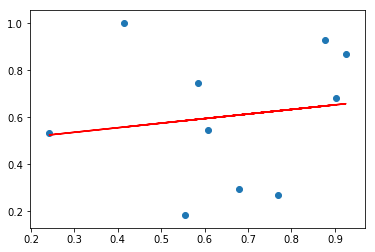

In [2]:
#linear regression y = m*x + b
m = 0
b = 0

#implement using m = sum((x - x_mean)(y - y_mean)) / sum((x - x_mean)^2)
def lr(X, Y):
    global m,b
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    num = 0
    den = 0
    
    ## iterative
    #for x, y in zip(X, Y):
    #    num += (x - x_mean)*(y - y_mean)
    #    den += (x - x_mean)*(x - x_mean)
    
    ## vectorial
    num = sum((x -x_mean)*(y -y_mean))
    den = sum((x -x_mean)**2)
    
    m = num/den
    b = y_mean - (m * x_mean)

#calculate
lr(x, y)
print("m:{} b:{}".format(m, b))
plt.scatter(x, y)
plt.plot(x, m*x+b, 'r')

## Gradient Descent

m1:0.03766230033711625 b1:0.056177270158737726  (red)
m2:0.13595635706017709 b2:0.23515915666957343  (yellow)
m3:0.1645371968850727 b3:-0.024099592064884212  (green)


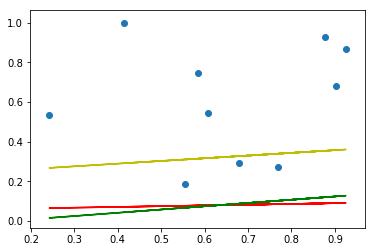

In [3]:
#using linear regression formula: y = m*x + b

#implement gradient descent
def gd(X, Y, lr):
    m = 0
    b = 0
    for x, y in zip(X,Y):
        pred = m*x + b
        err = y - pred
        b += err * lr
        m += x * err * lr

    return m, b

#calculate
learnin_rate = 0.01
m1, b1 = gd(x, y, learnin_rate)
print("m1:{} b1:{}  (red)".format(m1, b1))

learnin_rate = 0.5
m2, b2 = gd(x, y, learnin_rate)
print("m2:{} b2:{}  (yellow)".format(m2, b2))

learnin_rate = 1
m3, b3 = gd(x, y, learnin_rate)
print("m3:{} b3:{}  (green)".format(m3, b3))

plt.scatter(x, y)
plt.plot(x, m1*x+b1, 'r')
plt.plot(x, m2*x+b2, 'y')
plt.plot(x, m3*x+b3, 'g')